In [36]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (log loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
    return theta

# Sample dataset (10×3)
X = np.array([
    [1.2, 3.4],
    [2.1, 0.9],
    [3.3, 4.5],
    [4.1, 2.2],
    [5.0, 3.3],
    [6.2, 4.4],
    [7.4, 5.5],
    [8.1, 6.1],
    [9.0, 7.2],
    [10.5, 8.3]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)  # Binary labels

# Add bias column
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize parameters
theta = np.zeros((X_b.shape[1], 1))

# Train
theta = gradient_descent(X_b, y, theta, alpha=0.1, iterations=1000)

# Predict function
def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    return (prob >= 0.5).astype(int)

# Predict on training data
predictions = predict(X_b, theta)

print("Final Theta:")
print(theta)
print("Predictions:")
print(predictions.ravel())


Final Theta:
[[-4.99072034]
 [ 1.33587041]
 [-0.26866932]]
Predictions:
[0 0 0 0 1 1 1 1 1 1]


In [33]:
import numpy as np
# Sample dataset (10×3)
x = np.array([
    [1.2, 3.4],
    [2.1, 0.9],
    [3.3, 4.5],
    [4.1, 2.2],
    [5.0, 3.3],
    [6.2, 4.4],
    [7.4, 5.5],
    [8.1, 6.1],
    [9.0, 7.2],
    [10.5, 8.3]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)  # Binary labels
x = np.hstack([np.ones((x.shape[0], 1)), x]) # Add bias column
w = np.zeros((x.shape[1], 1)) # Initialize parameters

In [38]:
alpha,epochs,m=.1,1000,len(y)
for i in range(epochs):
    z=x@w
    g=1 / (1 + np.exp(-z))
    cost = -(1/m) * (y.T @(np.log(g)) + (1 - y).T @(np.log(1 - g)))
    gradient = (1/m) * x.T@(g - y)
    w -= alpha * gradient

In [39]:
z=x@w
g=1 / (1 + np.exp(-z))
predict,per=[],0
for i in range(len(g)):
  if(g[i]<.5):
    predict.append(0)
  else:
    predict.append(1)
  if predict[i]==y[i]:
      per+=1
print(per/m*100,'%')

100.0 %


Text(0, 0.5, 'predict')

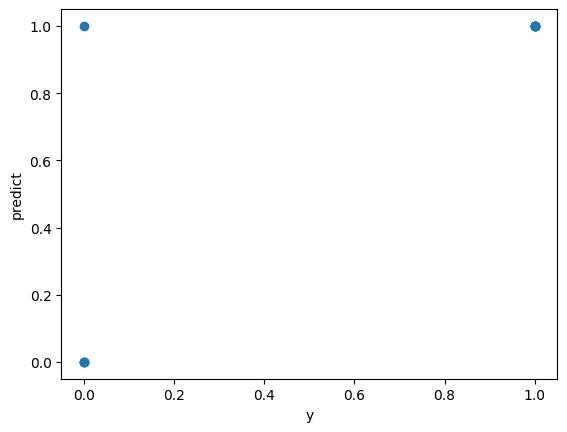

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y,predict)
plt.xlabel('y')
plt.ylabel('predict')